In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
age=np.array([16,24,31,29,40,33,18,15,19,21,29,31,24,20,34,22,32,36,37])
job=np.array([0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1,1])

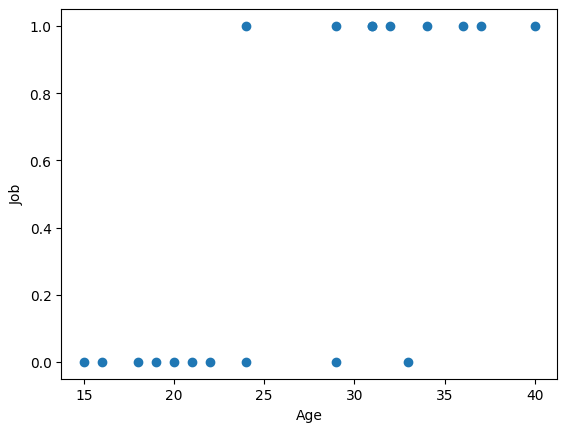

In [5]:
plt.scatter(age, job)
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

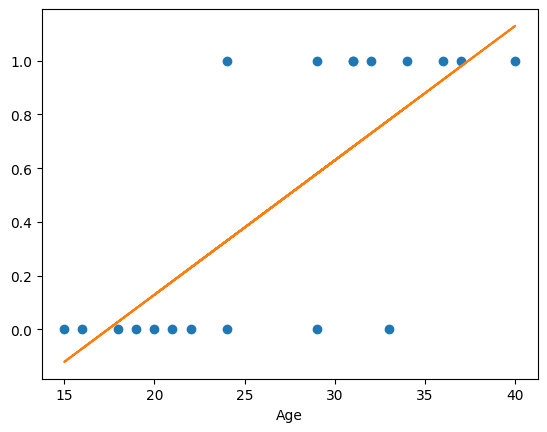

In [ ]:
m,c = np.polyfit(age, job, 1)#m is the slope and c is the intercept of the line y=mx+c that best fits our data
plt.xlabel('Age')
plt.plot(age, job, 'o')
plt.plot(age, m*age+c)

In [43]:
data = pd.DataFrame(pd.read_csv('Bank.csv')) #load the Bank dataset
data

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...
41183,59,222,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,196,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,62,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,200,-3.4,92.431,-26.9,0.742,5017.5,0


In [8]:
data.isnull().sum() #check for missing values

age               0
duration          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
#select data for dependent variable and independent variable
x = data.iloc[:, :7] #independent variable colum 0 to 6
y = data.iloc[:, 7]#dependent variable column 7

In [ ]:
print('x shape: ', x.shape)#print the shape of rows and columns
print('y shape: ',y.shape)

x shape:  (41188, 7)
y shape:  (41188,)


In [ ]:
y.value_counts()#count the number of unique values in the dependent variable

y
0    36548
1     4640
Name: count, dtype: int64

In [12]:
#split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

In [13]:
#check how many data points are in the training and testing data
len(x_train), len(x_test), len(y_train), len(y_test)

(32950, 8238, 32950, 8238)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [ ]:
#creating and train the model
model = LogisticRegression()#create the model
model.fit(x_train, y_train)#train the model

LogisticRegression()

In [ ]:
model.score(x_train, y_train)#check the accuracy of the model on the training data

0.9048254931714719

In [ ]:
y_pred = model.predict(x_test)#predict the y data using the x_test data

In [18]:
y_test

33148    0
27585    0
15722    0
40349    1
2576     0
        ..
661      0
40023    0
3643     0
30302    0
35504    1
Name: y, Length: 8238, dtype: int64

In [25]:
y_pred_prob = model.predict_proba(x_test)#predict the probability of the test data
#probability values are between 0 and 1
#if it is more than 0.5, the output is 1, otherwise 0
print(y_pred_prob)


[[0.98853983 0.01146017]
 [0.99115365 0.00884635]
 [0.97866361 0.02133639]
 ...
 [0.9464971  0.0535029 ]
 [0.99197106 0.00802894]
 [0.58357556 0.41642444]]


# Getting Probability values


In [ ]:
y_pred_prob = model.predict_proba(x_test)[:,1]#predict the probability to be 1
#probability values are between 0 and 1
#if it is more than 0.5, the output is 1, otherwise 0
print(y_pred_prob)

[0.01146017 0.00884635 0.02133639 ... 0.0535029  0.00802894 0.41642444]


In [29]:
confusion_matrix(y_test, y_pred)#create a confusion matrix

array([[7097,  185],
       [ 636,  320]], dtype=int64)

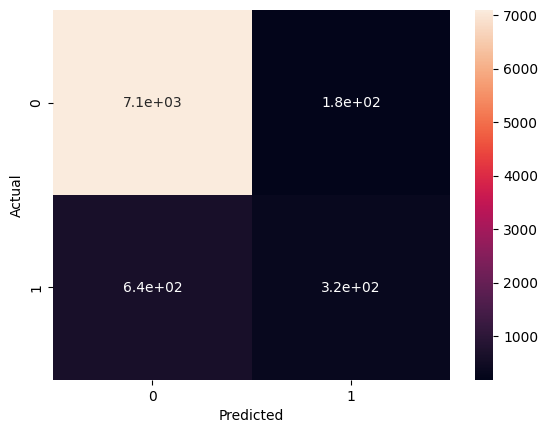

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)#create a heatmap of the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')    
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler#use for normalization

In [48]:
scaler=MinMaxScaler()#create a scaler object

data_normalized = scaler.fit_transform(data)#normalize the data


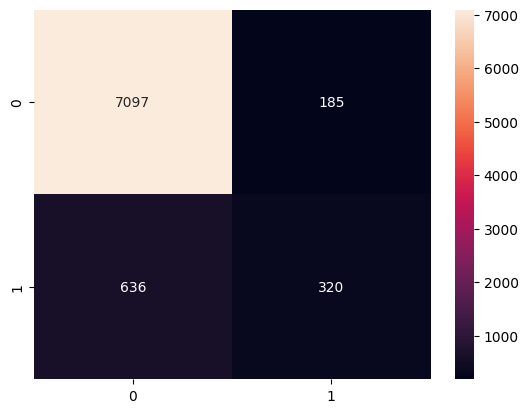

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")#create a heatmap of the normalized data
plt.show()

# Evaluation Matrix

In [40]:
classification_report(y_test, y_pred)#create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7282
           1       0.63      0.33      0.44       956

    accuracy                           0.90      8238
   macro avg       0.78      0.65      0.69      8238
weighted avg       0.88      0.90      0.89      8238



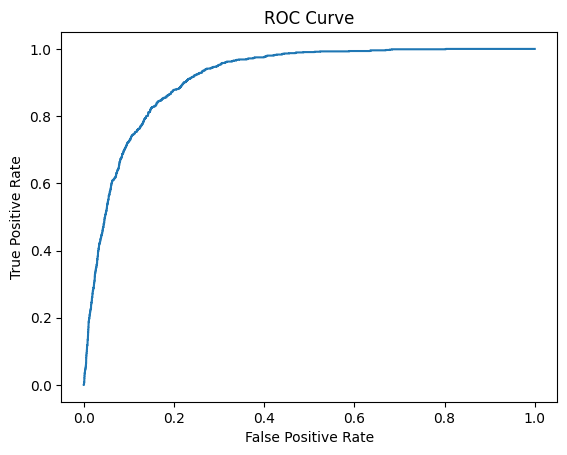

In [41]:
fpr,tpr,_=roc_curve(y_test, y_pred_prob)#create a ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [49]:
roc_auc_score(y_test,y_pred_prob)

0.9143506255465703

# How to check model


In [50]:
arr=np.array([28,339,-1.7,94.055,-39.8,0.729,4991]).reshape(1,7)#create a new data point

In [ ]:
model.predict(arr)#predict the new data point


array([0], dtype=int64)

In [53]:
result=pd.DataFrame(data=[y_test.values, y_pred], index=['y_test', 'y_pred'])#create a dataframe of the y_test and y_pred data
result.transpose()#transpose the dataframe


,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
8233,0,0
8234,0,0
8235,0,0
8236,0,0


In [54]:
roc_auc_score(y_test, y_pred_prob)#calculate the ROC AUC score

0.9143506255465703

In [55]:
y_test.head()#show the first 5 data points of the y_test data

33148    0
27585    0
15722    0
40349    1
2576     0
Name: y, dtype: int64

# Check How many values are correct

In [ ]:
correct_sum=[]#create an empty list
pred=model.predict(x_test)#predict the x_test data
correct=np.sum(pred==y_test)#sum the correct predictions
correct_sum.append(correct)#append the correct predictions to the list

In [ ]:
correct_sum#show the correct predictions

[7417]

In [ ]:
len(x_test)#show the length of the x_test data

8238